In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Set matplotlib to display plots inline
%matplotlib inline

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Create 400 samples (similar to the typical Social_Network_Ads dataset)
n_samples = 400

# Generate age (18-60 years)
age = np.random.randint(18, 61, n_samples)

# Generate estimated salary (15k-150k)
salary = np.random.randint(15000, 150001, n_samples)

# Generate target (purchased or not) based on age and salary
# Higher age and salary increases chance of purchase
purchase_prob = 1 / (1 + np.exp(-(age/50 + salary/100000 - 1.5)))
purchased = np.random.binomial(1, purchase_prob)

# Create DataFrame
data = {
    'Age': age,
    'EstimatedSalary': salary,
    'Purchased': purchased
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Social Network Ads Dataset (First 5 rows):")
df.head()

Social Network Ads Dataset (First 5 rows):


,Age,EstimatedSalary,Purchased
0,56,115235,0
1,46,89740,1
2,32,131352,0
3,60,81617,0
4,25,31896,0


In [3]:
# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Statistics:")
df.describe()

Dataset Shape: (400, 3)

Feature Statistics:


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,39.605000,80844.840000,0.537500
std,12.374846,39484.169884,0.499216
min,18.000000,15404.000000,0.000000
25%,29.000000,42699.750000,0.000000
50%,41.000000,81218.500000,1.000000
75%,50.000000,117134.250000,1.000000
max,60.000000,149668.000000,1.000000


In [4]:
# Examine class distribution
print("Class Distribution:")
print(df['Purchased'].value_counts())
print(f"Percentage of purchases: {df['Purchased'].mean() * 100:.2f}%")

Class Distribution:
Purchased
1    215
0    185
Name: count, dtype: int64
Percentage of purchases: 53.75%


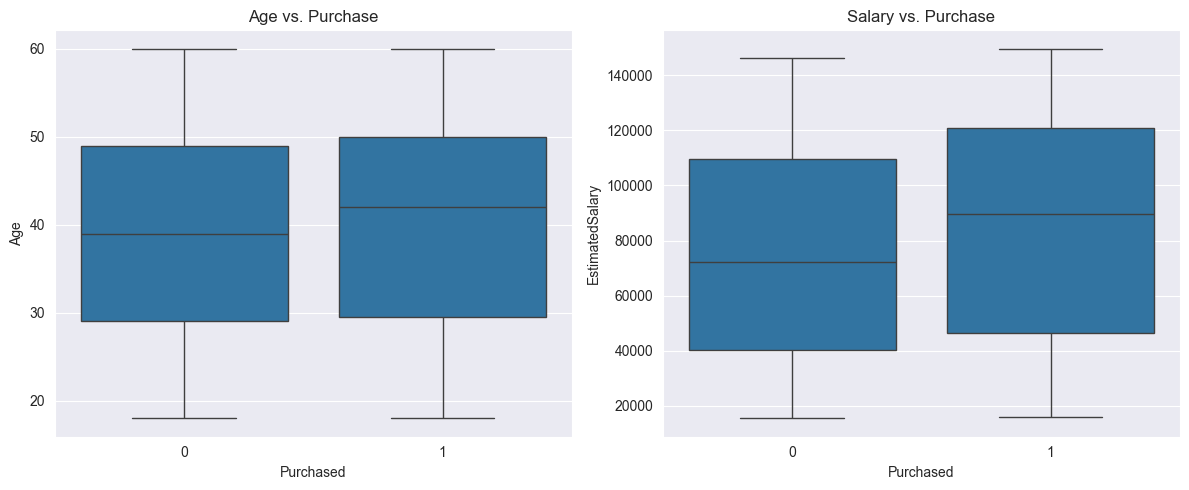

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Age vs. Purchase')

plt.subplot(1, 2, 2)
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.title('Salary vs. Purchase')

plt.tight_layout()
plt.show()

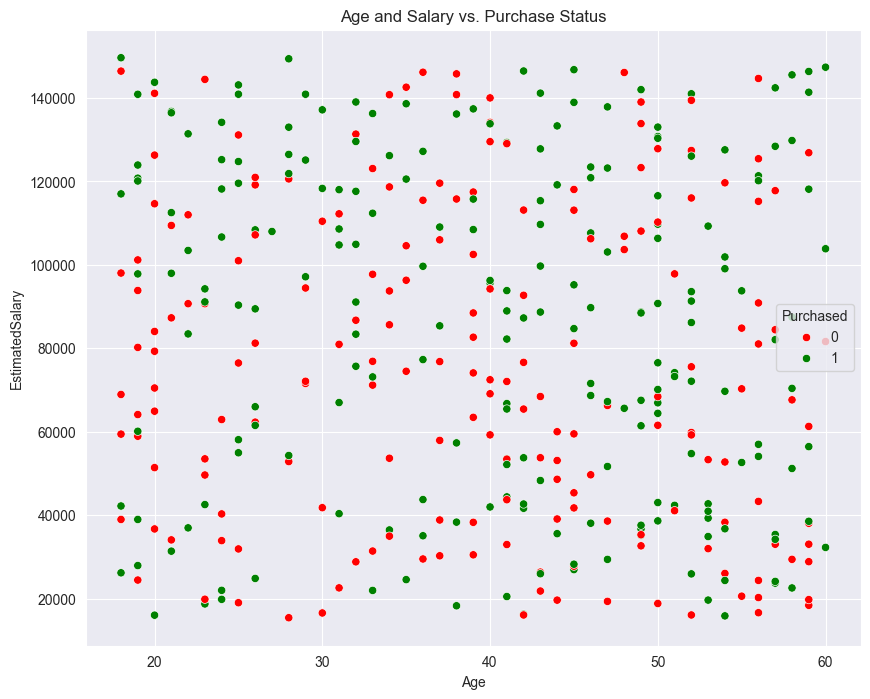

In [6]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette=['red', 'green'])
plt.title('Age and Salary vs. Purchase Status')
plt.show()

In [7]:
# Split the dataset into features and target
X = df.iloc[:, :-1].values  # Age and EstimatedSalary
y = df.iloc[:, -1].values   # Purchased

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (300, 2)
Testing set shape: (100, 2)


In [8]:
# Feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [9]:
# Train the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [10]:
# Make predictions
y_pred = classifier.predict(X_test_scaled)

Confusion Matrix:
[[17 28]
 [13 42]]

True Positives (TP): 42
False Positives (FP): 28
True Negatives (TN): 17
False Negatives (FN): 13


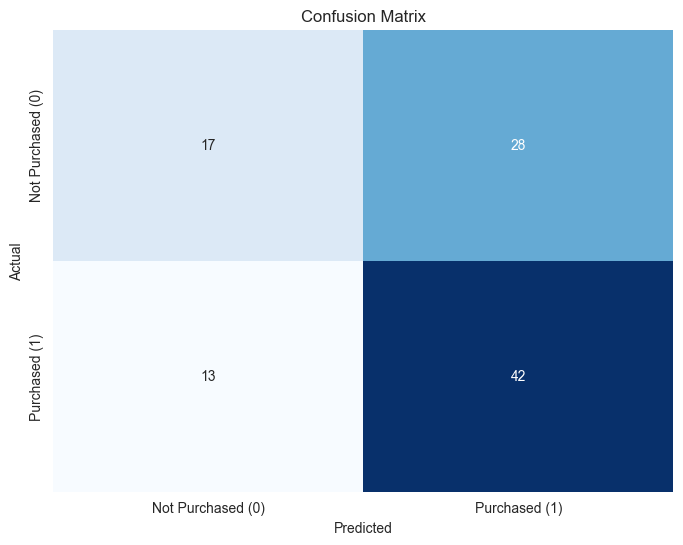

In [11]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Extract TP, FP, TN, FN
tn, fp, fn, tp = cm.ravel()
print("\nTrue Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Not Purchased (0)', 'Purchased (1)'])
plt.yticks([0.5, 1.5], ['Not Purchased (0)', 'Purchased (1)'])
plt.show()

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate error rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.59
Error Rate: 0.41000000000000003
Precision: 0.6
Recall: 0.7636363636363637
F1 Score: 0.672


In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.38      0.45        45
           1       0.60      0.76      0.67        55

    accuracy                           0.59       100
   macro avg       0.58      0.57      0.56       100
weighted avg       0.58      0.59      0.57       100



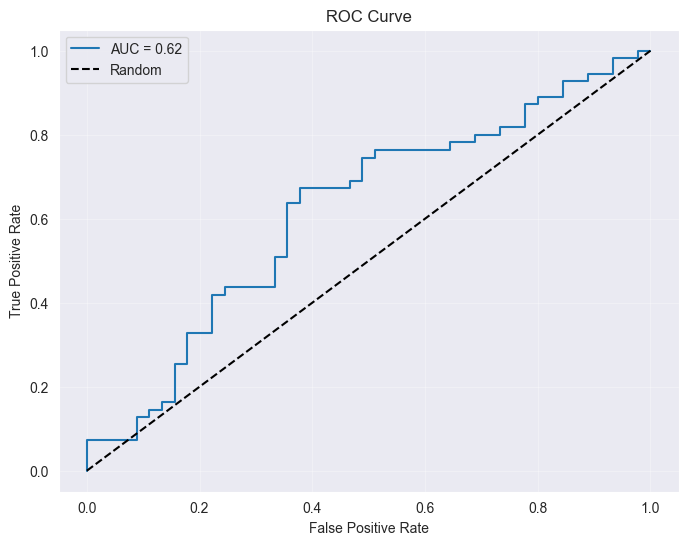

In [14]:
# Calculate and plot ROC Curve
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

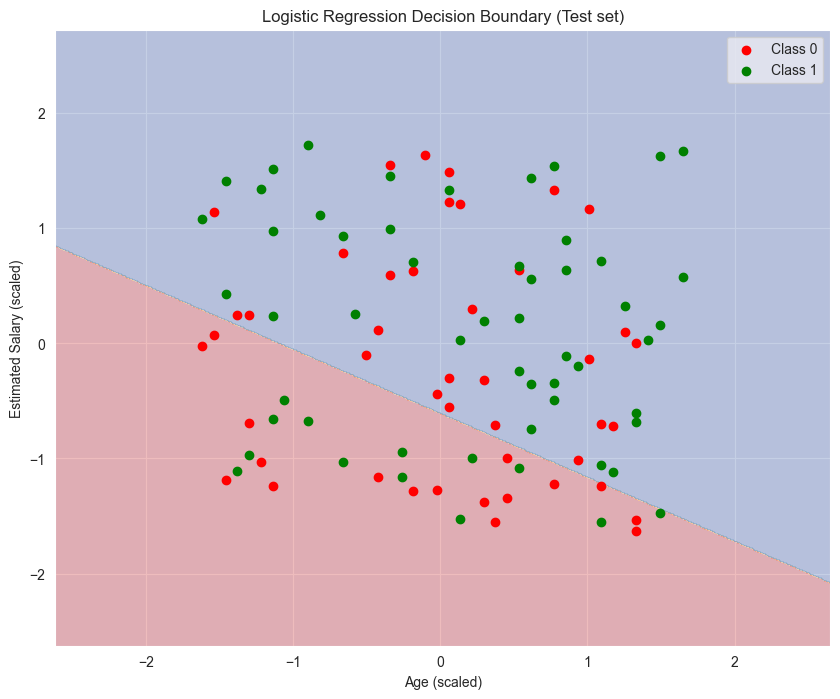

In [15]:
# Visualize the logistic regression decision boundary
plt.figure(figsize=(10, 8))

# Create a meshgrid of points to plot the decision boundary
X_set, y_set = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
                     np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.3, cmap=plt.cm.RdYlBu)

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['red', 'green'][j], label=f'Class {j}')

plt.title('Logistic Regression Decision Boundary (Test set)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()